In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import seaborn as sns
import pylab as plt
import calmap
bkg=pd.read_csv('../data/61aBangkok.csv', index_col=[-1], parse_dates=True)

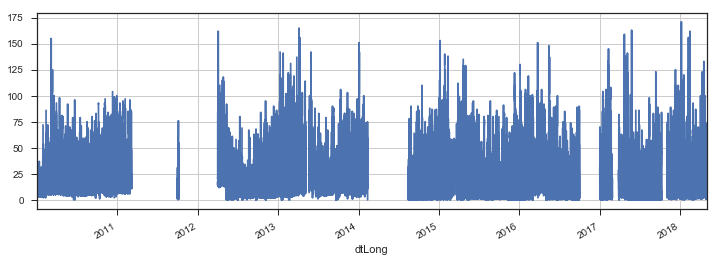

In [3]:
# Set major seaborn asthetics
plt.figure(figsize=(12,4))
sns.set("notebook", style='ticks', font_scale=1.0)
bkg['O3'].plot(grid=True)

In [4]:
bkgmean=bkg.groupby([(bkg.index.year),(bkg.index.month)]).mean()

In [12]:
bkgmean.head()

CO    Glob rad         NO        NO2        NOX  \
dtLong dtLong                                                          
2010   1       1.237781  120.195122  21.877061  19.278861  41.157421   
       2       0.570266  154.282738   5.987480  17.306729  23.309859   
       3       0.746704  184.327957   8.569425  20.594670  29.119215   
       4       0.548617  191.804167   4.385174  14.523256  18.869186   
       5       0.630520  147.990591   8.914326  17.464888  26.358146   

                  Net rad         O3       PM10  PM2.5    Pressure      Rain  \
dtLong dtLong                                                                  
2010   1        58.556671   9.961019  50.434720    NaN  760.770445  0.116212   
       2        98.708333  21.528037  28.994048    NaN  759.985119  0.029895   
       3       143.556452  31.223001  52.083333    NaN  759.825269  0.008737   
       4       172.565278  24.359012  39.729167    NaN  758.990278  0.034028   
       5       119.674731  18.688202  36.728129    NaN  756.918011  0.302419   

                 Rel hum       SO2       Temp    Wind dir  Wind speed  
dtLong dtLong                                                          
2010   1       67.802009  4.617691  28.937446  157.773314    0.963845  
       2       70.456587  6.114420  30.342921  185.882090    1.626567  
       3       63.595946  6.485273  30.968414  170.103495    1.689113  
       4       66.338889  5.490566  31.915000  179.065278    1.825000  
       5       71.181452  4.695225  31.595430  186.655914    1.366935

In [6]:
# #plt.figure(figsize=(20,100), dpi=200)
# fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8,16), dpi=200)
# plt.hold(True)
# counter=0
# for i in range(2010,2016):
#     print(i)
#     calmap.yearplot(bkg['O3'], year=i, ax=axes[counter], vmin=0., vmax=300.)
#     counter = counter+1
# plt.tight_layout

/Users/ptg21/anaconda/envs/basemap/lib/python2.7/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
/Users/ptg21/anaconda/envs/basemap/lib/python2.7/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


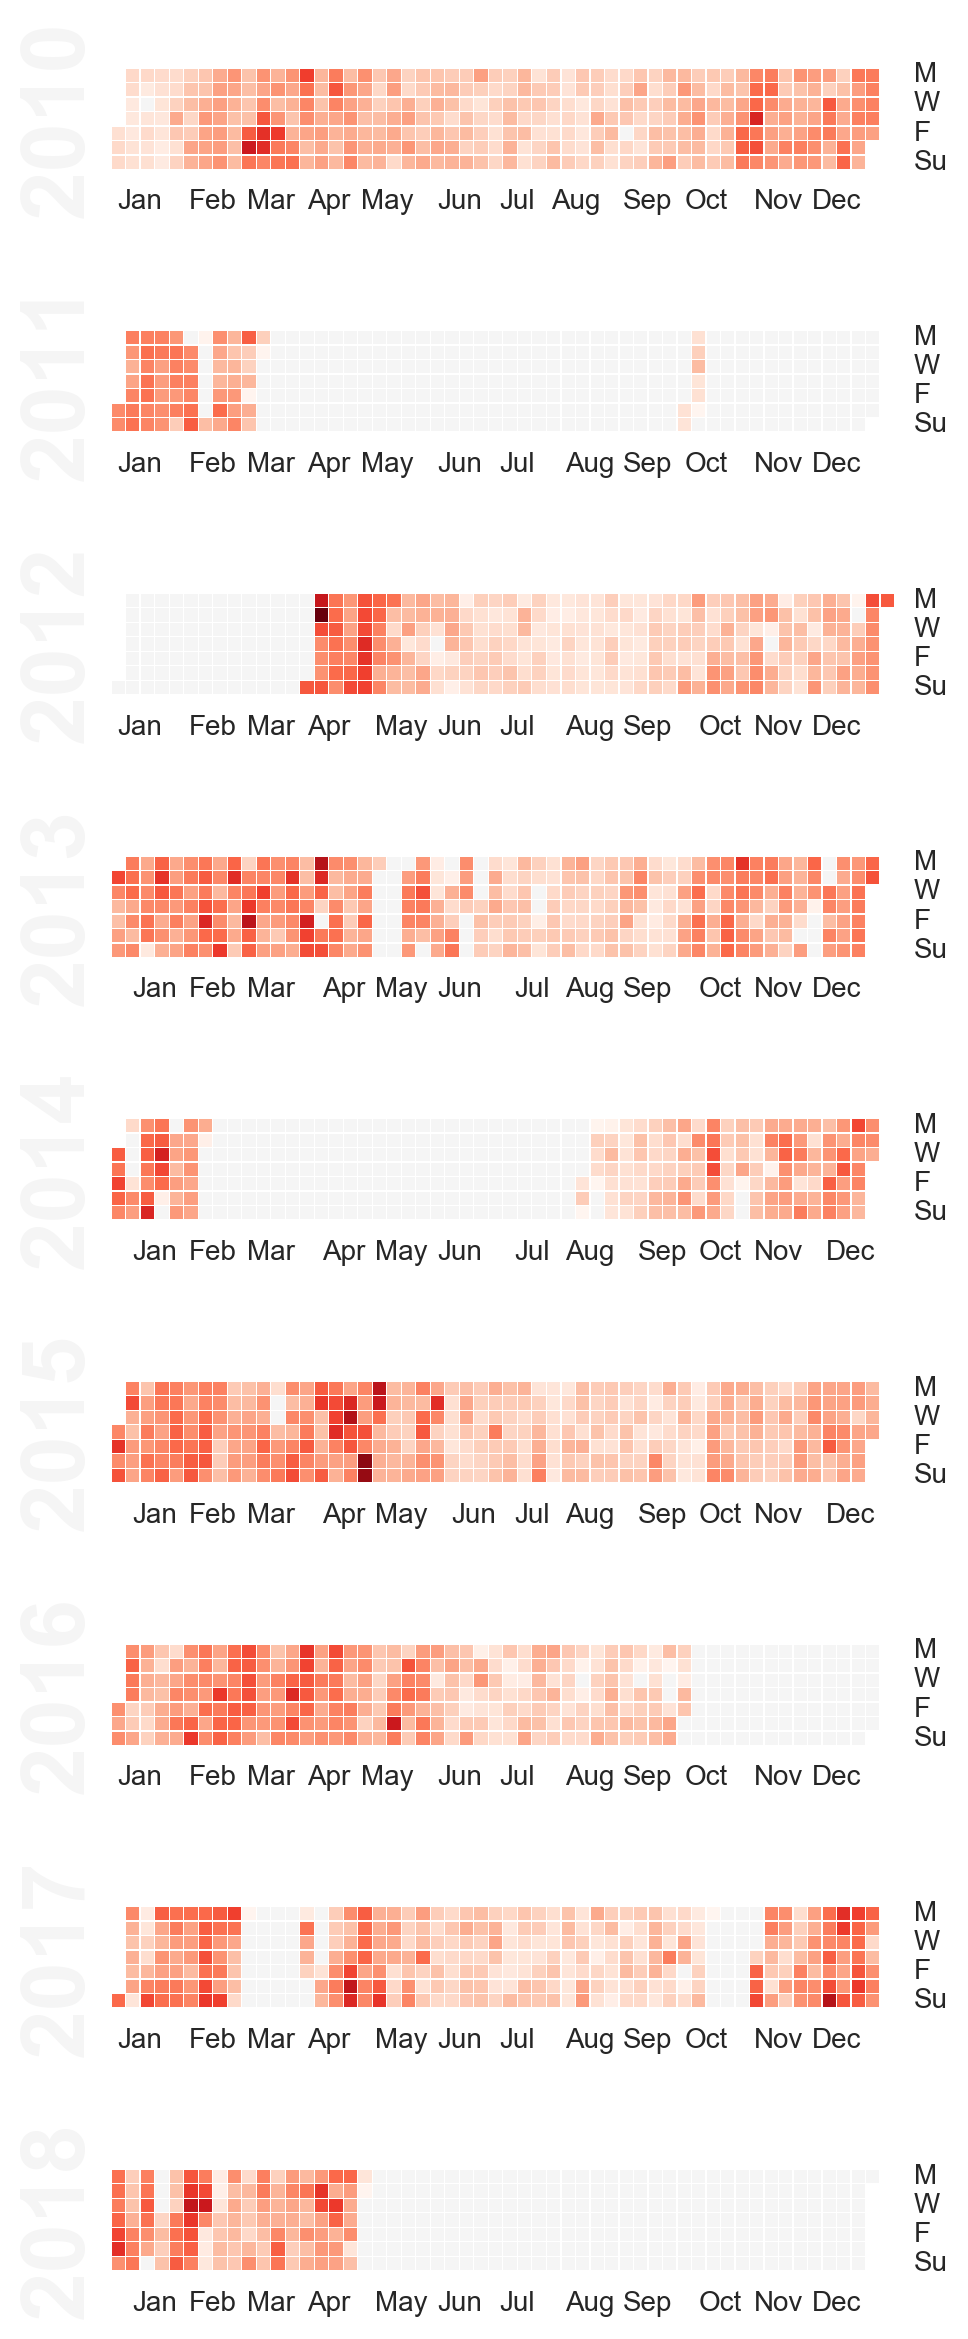

In [7]:
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,16), dpi=200)
calmap.calendarplot(bkg['O3'], vmin=0., fig_kws={'figsize':[5,12], 'dpi':200.}, yearlabels=True,  
                    daylabels=['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su'], 
                    dayticks=[0, 2, 4, 6], cmap='Reds',
                    linewidth=0.1)#fillcolor='white'
plt.savefig('../figures/O3_calplot.png')

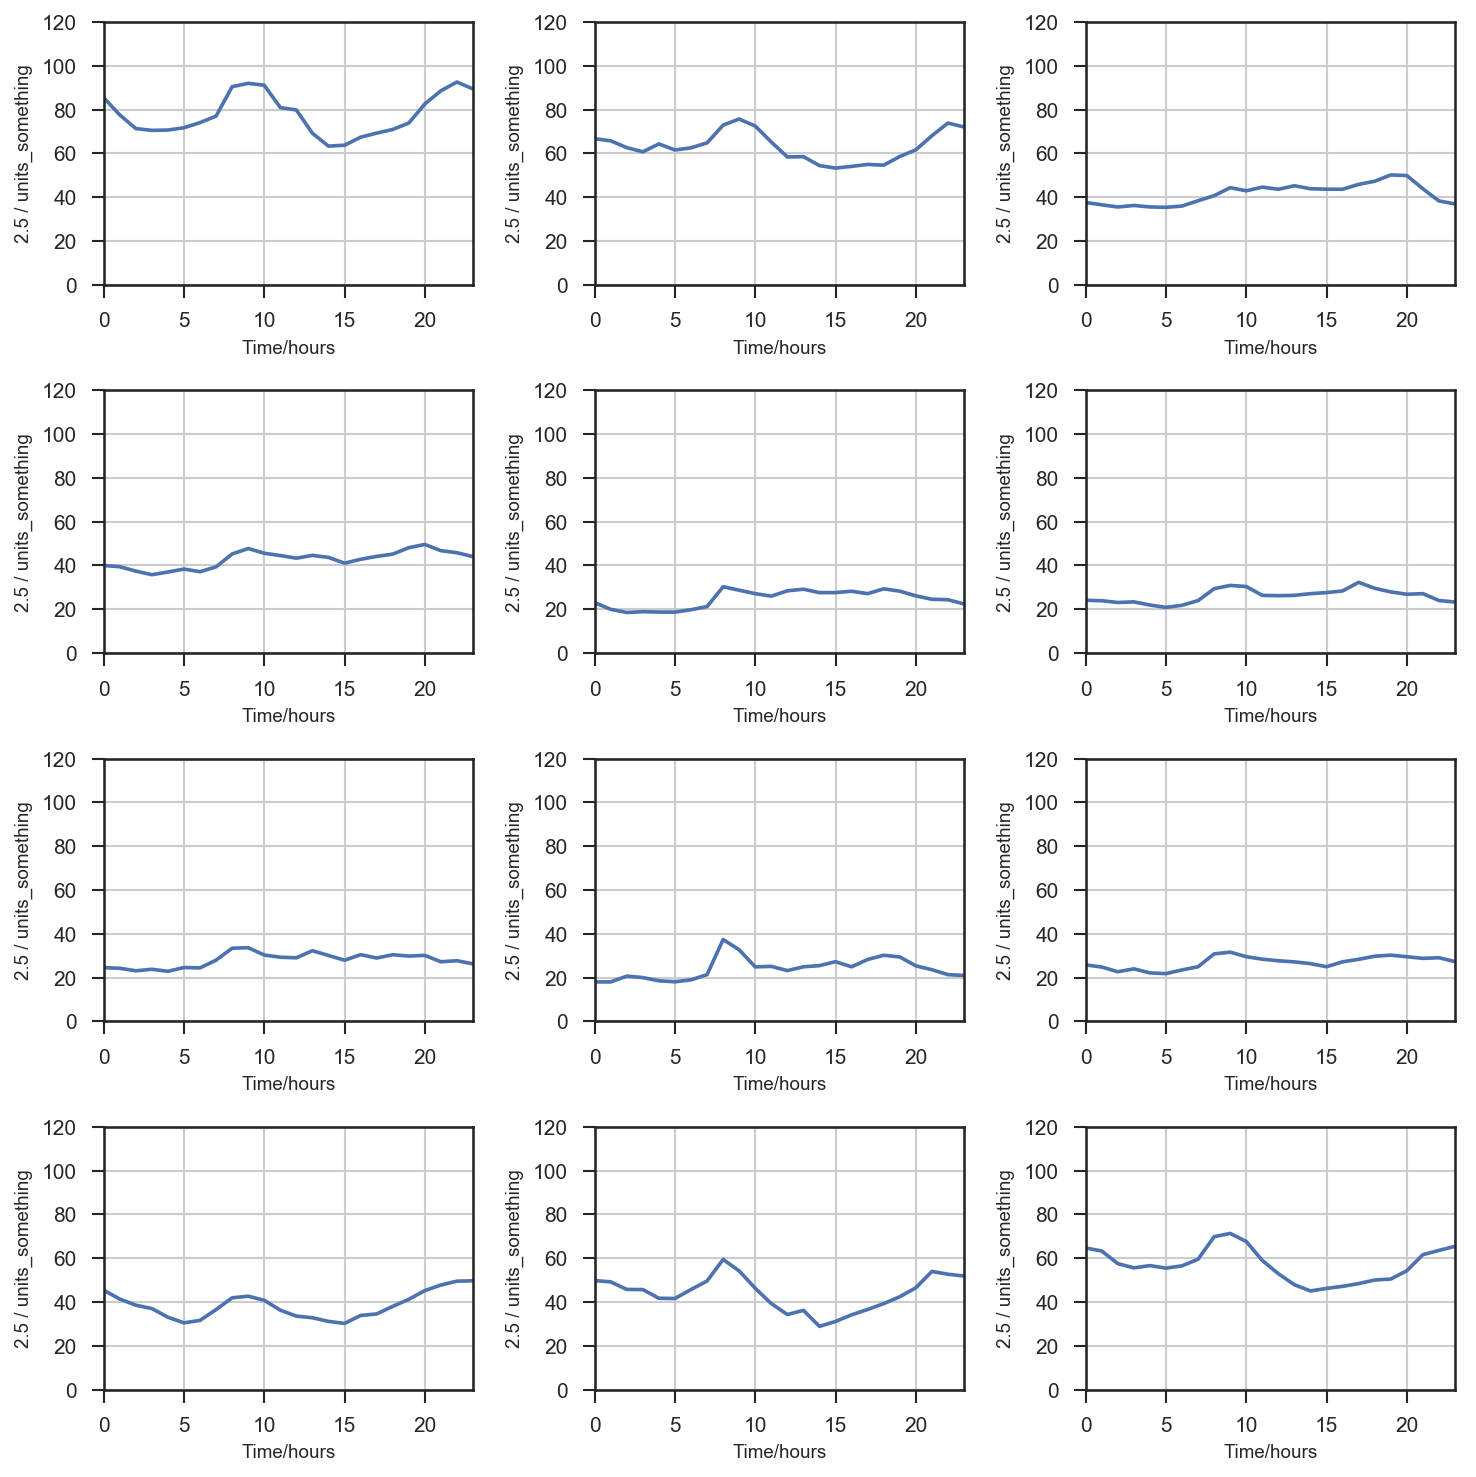

In [11]:
import datetime
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10), dpi=150)
counter=0
month_length=[31,28,31,30,31,30,31,31,30,31,30,31]
for ivar in range(1,13):
    # fix me 
    bkg_spr=bkg[datetime.date(year=2015,month=ivar,day=1):datetime.date(year=2015,month=ivar,day=month_length[counter])]
    bkghrlymean=bkg_spr.groupby([(bkg_spr.index.hour)]).mean()
    plot=bkghrlymean['PM10'].plot(ax=axes.flat[counter], grid=True, ylim=(0,120))
    plot.set_xlabel('Time/hours', fontsize=9)
    plot.set_ylabel('2.5 / units_something', fontsize=9)
    counter = counter+1
plt.tight_layout()
plt.savefig('../figures/monthly_2015_diurnal_cycles_O3.png')

In [15]:
# select based on season
# code stolen from
# https://stackoverflow.com/questions/25647546/pandas-efficient-groupby-season-for-every-year
month_num_to_season =   { 1:'DJF',  2:'DJF', 
                          3:'MAM',  4:'MAM',  5:'MAM', 
                          6:'JJA',  7:'JJA',  8:'JJA',
                          9:'SON', 10:'SON', 11:'SON',
                         12:'DJF'}
bkg_2015=bkg[datetime.date(year=2015,month=1,day=1):datetime.date(year=2015, month=12, day=31)]
grouped =  bkg_2015.groupby([lambda x: month_num_to_season.get(x.month),(bkg_2015.index.hour)]).mean() 

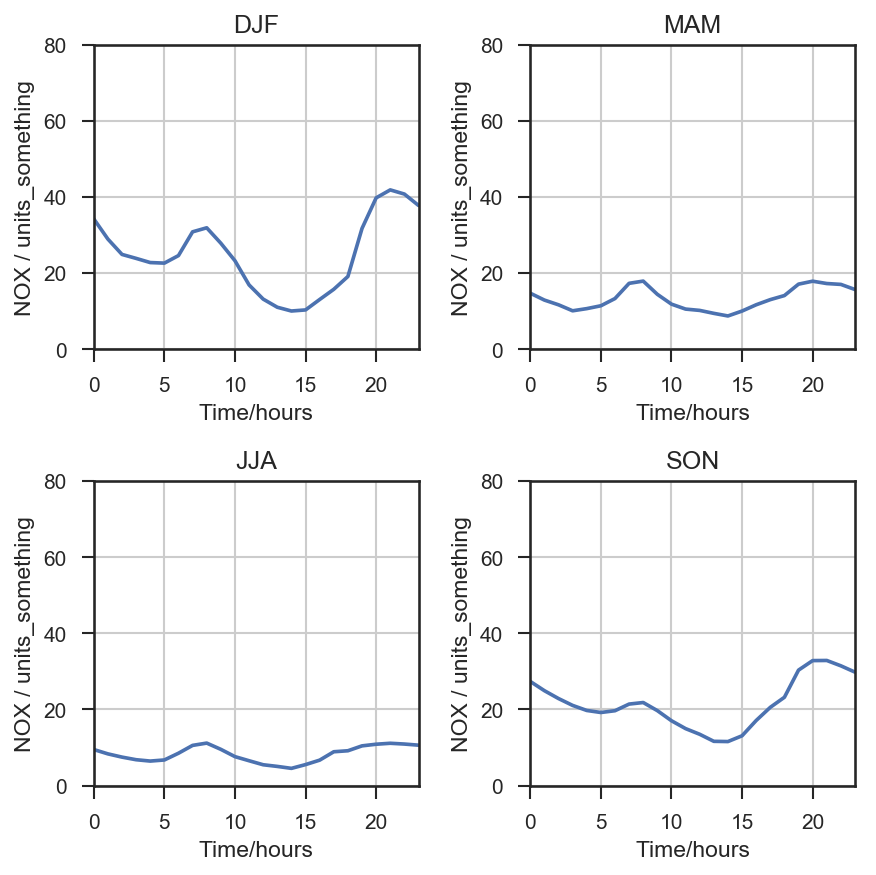

In [20]:
import datetime
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), dpi=150)
counter=0
labels=['DJF','MAM','JJA','SON']
for ivar in range(1,12,3):
    # select based on value of index using loc
    # https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label
    bkghrlymean=grouped.loc[labels[counter]]
    # plot these data
    plot=bkghrlymean['NO2'].plot(ax=axes.flat[counter], grid=True, ylim=(0,80))
    plot.set_xlabel('Time/hours')
    plot.set_ylabel('NOX / units_something')
    plot.set_title(labels[counter])
    counter = counter+1

plt.tight_layout()
plt.savefig('../figures/2015_diurnal_by_season_cycles_O3.png')

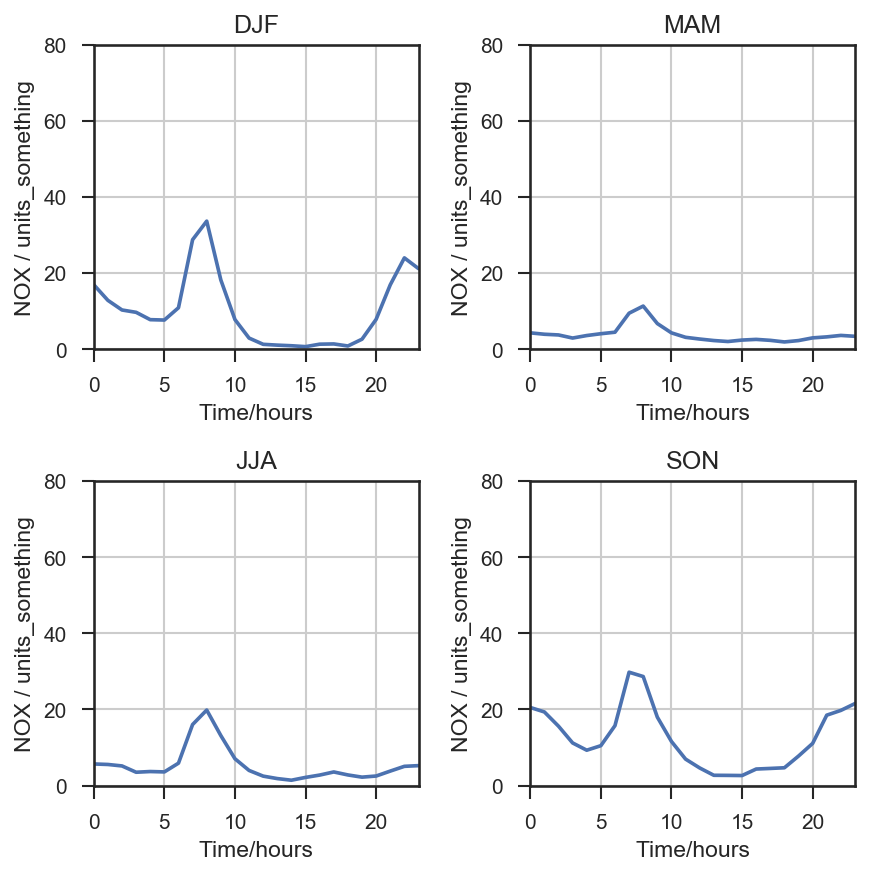

In [21]:
import datetime
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), dpi=150)
counter=0
labels=['DJF','MAM','JJA','SON']
for ivar in range(1,12,3):
    # select based on value of index using loc
    # https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label
    bkghrlymean=grouped.loc[labels[counter]]
    # plot these data
    plot=bkghrlymean['NO'].plot(ax=axes.flat[counter], grid=True, ylim=(0,80))
    plot.set_xlabel('Time/hours')
    plot.set_ylabel('NOX / units_something')
    plot.set_title(labels[counter])
    counter = counter+1

plt.tight_layout()
plt.savefig('../figures/2015_diurnal_by_season_cycles_O3.png')

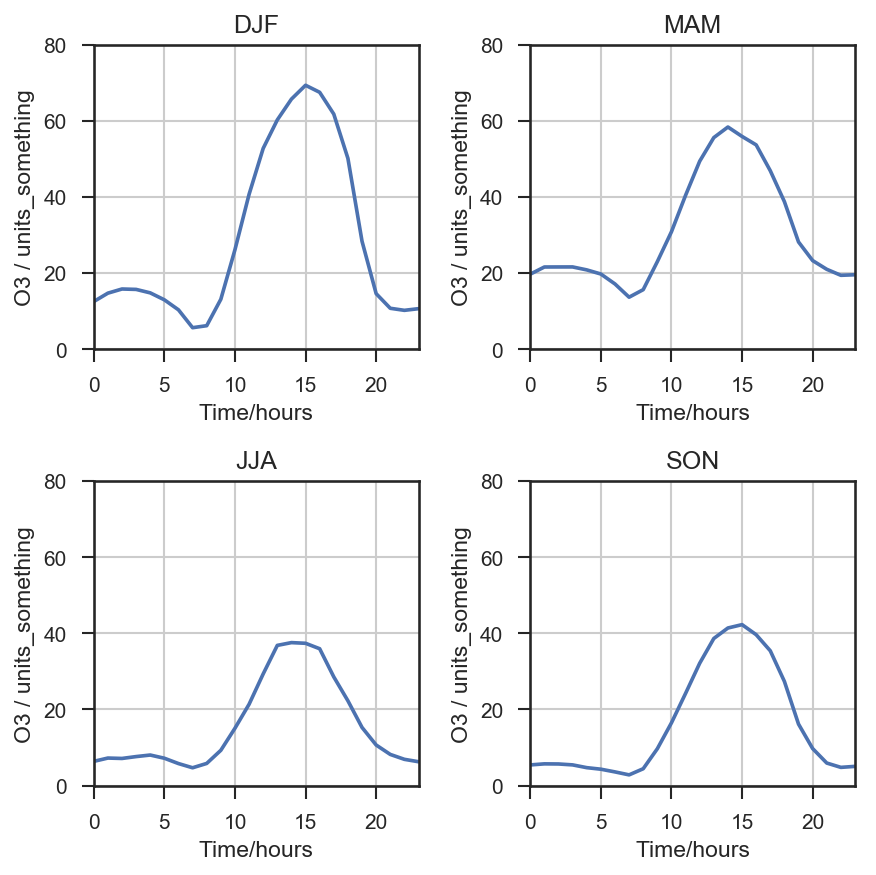

In [19]:
import datetime
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), dpi=150)
counter=0
labels=['DJF','MAM','JJA','SON']
for ivar in range(1,12,3):
    # select based on value of index using loc
    # https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label
    bkghrlymean=grouped.loc[labels[counter]]
    # plot these data
    plot=bkghrlymean['O3'].plot(ax=axes.flat[counter], grid=True, ylim=(0,80))
    plot.set_xlabel('Time/hours')
    plot.set_ylabel('O3 / units_something')
    plot.set_title(labels[counter])
    counter = counter+1

plt.tight_layout()
plt.savefig('../figures/2015_diurnal_by_season_cycles_O3.png')

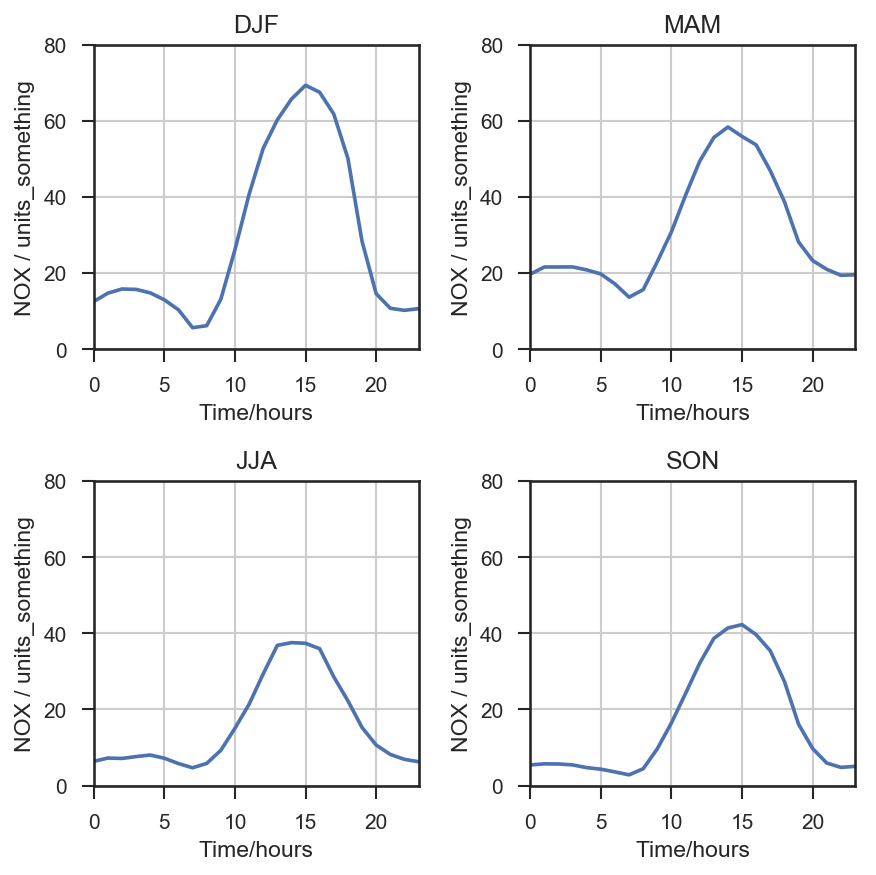

In [22]:
import datetime
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), dpi=150)
counter=0
labels=['DJF','MAM','JJA','SON']
for ivar in range(1,12,3):
    # select based on value of index using loc
    # https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label
    bkghrlymean=grouped.loc[labels[counter]]
    # plot these data
    plot=(bkghrlymean['O3']).plot(ax=axes.flat[counter], grid=True, ylim=(0,80))
    plot.set_xlabel('Time/hours')
    plot.set_ylabel('NOX / units_something')
    plot.set_title(labels[counter])
    counter = counter+1

plt.tight_layout()
plt.savefig('../figures/2015_diurnal_by_season_cycles_O3.png')